In [1]:
### Local imports ###
import sys
sys.path.append('../') # define relative path for local imports
from src.models.scm import SCM
from src.datasets.dataset import SCMDataset


In [5]:
path_generated_images = "/var/hub/VITON-HD-results-ladi-vton"
path_garment_images = "/var/hub/VITON-HD/test"
mode = "train"

dataset = SCMDataset(path_generated_images, path_garment_images, mode)
elemt = dataset[1]



In [6]:
# Display different images
import PIL  
import numpy as np
import matplotlib.pyplot as plt
from refiners.fluxion.utils import tensor_to_image

def display_image(image):
    image_to_display = tensor_to_image(image.unsqueeze(0))
    plt.imshow(image_to_display)
    plt.show()

09520_00.jpg


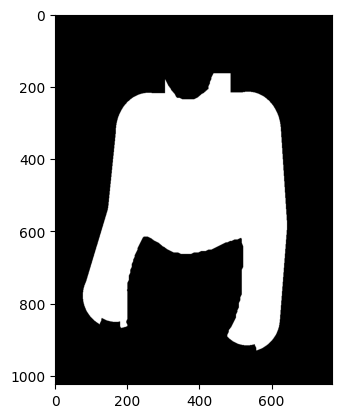

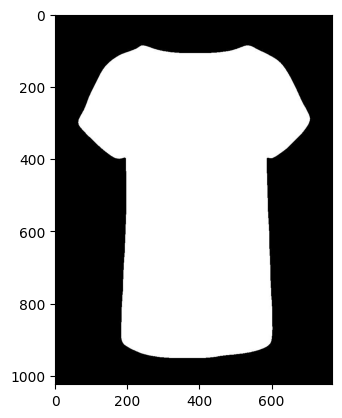

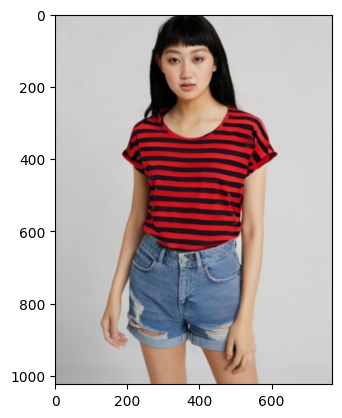

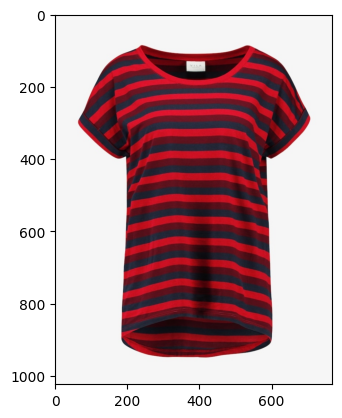

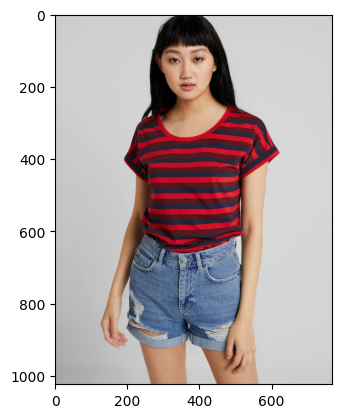

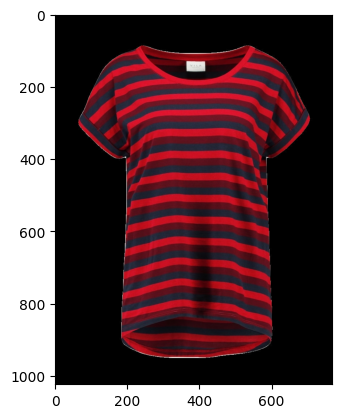

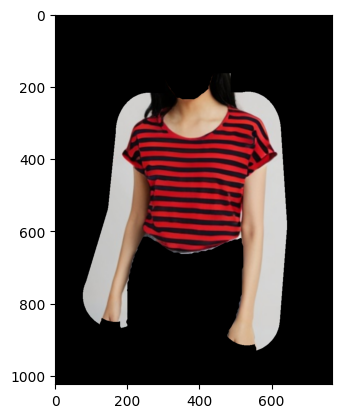

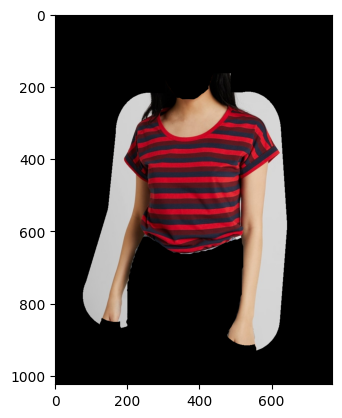

In [7]:

print(elemt["file_name"])
for key in [
        "model_mask",
        "cloth_mask",
        "model_generated",
        "cloth",
        "model_real",
        "input_cloth",
        "input_model_generate",
        "target",
    ]:
    display_image(elemt[key])



In [5]:
img_channel = 6
width = 32

enc_blks = [2, 2, 4, 8]
middle_blk_num = 12
dec_blks = [2, 2, 2, 2]

# net = SCM(img_channel=img_channel, width=width, middle_blk_num=middle_blk_num,
#                     enc_blk_nums=enc_blks, dec_blk_nums=dec_blks)
net = NAFNet_Combine(img_channel=img_channel, width=width, middle_blk_num=middle_blk_num,
                    enc_blk_nums=enc_blks, dec_blk_nums=dec_blks)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 512, 384])
torch.Size([3, 512, 384])
torch.Size([512, 384, 3])


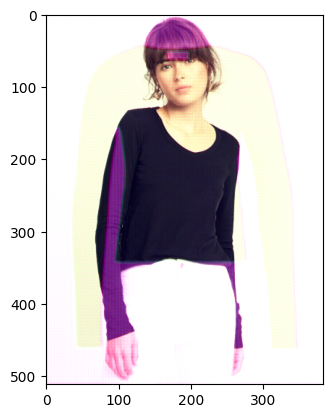

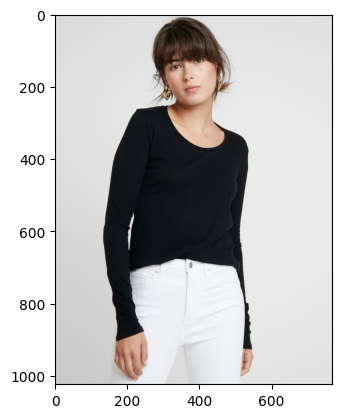

In [6]:
with torch.no_grad():
    out = net(batch)
    print(out.shape)

out = out.squeeze(0) # remove batch dimension
print(out.shape)
out = out.permute(1, 2, 0) # rearrange dimensions from (height, width, channels) to (channels, height, width)
print(out.shape)

plt.imshow(out)
plt.show()

plt.imshow(image_gt.squeeze(0).permute(1, 2, 0))
plt.show()
    